### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [107]:
data = pd.read_csv('data/coupons.csv')

In [108]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [110]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [111]:
bool_series = pd.isnull(data["car"]) 
data = data[bool_series]
data = data.drop(['car'],axis = 1)

data['Bar'].fillna(data['Bar'].mode()[0],inplace=True)
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0],inplace=True)
data['CarryAway'].fillna(data['CarryAway'].mode()[0],inplace=True)
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0],inplace=True)
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0],inplace=True)

In [112]:
data.age.value_counts()
data['age'].replace('50plus',51,inplace=True)
data['age'].replace('below21',20,inplace=True)
data['age'] = data['age'].astype('int')

In [113]:
data["passanger"] = data["passanger"].str.replace("\(s\)","")
data["passanger"].value_counts()

C:\Users\monke\AppData\Local\Temp/ipykernel_49896/1764085292.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



Alone      7249
Friend     3258
Partner    1075
Kid         994
Name: passanger, dtype: int64

After the data clean up no nulls in the dataset

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12576 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12576 non-null  object
 1   passanger             12576 non-null  object
 2   weather               12576 non-null  object
 3   temperature           12576 non-null  int64 
 4   time                  12576 non-null  object
 5   coupon                12576 non-null  object
 6   expiration            12576 non-null  object
 7   gender                12576 non-null  object
 8   age                   12576 non-null  int32 
 9   maritalStatus         12576 non-null  object
 10  has_children          12576 non-null  int64 
 11  education             12576 non-null  object
 12  occupation            12576 non-null  object
 13  income                12576 non-null  object
 14  Bar                   12576 non-null  object
 15  CoffeeHouse           12576 non-null

4. What proportion of the total observations chose to accept the coupon? 



-56.8 % accepted the coupons
Coffee House coupon is the maximum number of coupons given Restaurant(20-50) is the minimum number of coupons given

In [115]:
data['Y'].value_counts(normalize=True)

1    0.568384
0    0.431616
Name: Y, dtype: float64

<AxesSubplot:title={'center':'Coupons acceptance rate'}, ylabel='Y'>

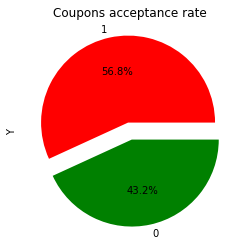

In [116]:
data['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['r','g'],title="Coupons acceptance rate")


In [117]:
px.histogram(data,x='coupon',color='Y',histnorm='percent',title="Percentage of accepted/ not accepted coupon for all types of coupon",labels={"coupon": "Coupons", "Y": "Accepted"}).update_xaxes(categoryorder='total descending')

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

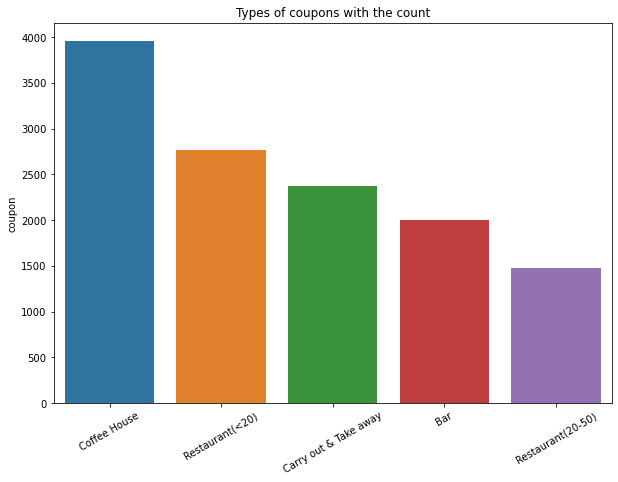

In [118]:
plt.figure(figsize=(10,7))
sns.barplot(x=data.coupon.value_counts().index, y=data.coupon.value_counts(), data=data).set_title("Types of coupons with the count")
plt.xticks(rotation=30)

6. Use a histogram to visualize the temperature column.

In [119]:
data['temperature'] = data['temperature'].astype('object')
px.histogram(data,x="temperature",category_orders=dict(day=["30", "55", "80"]),title="Plotting temperture with its total count")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [120]:
data_bar = data.query('coupon == "Bar"')
data_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid,Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend,Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend,Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend,Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


About 41% accepts the bar coupons

<AxesSubplot:title={'center':'Bar Coupons acceptance rate'}>

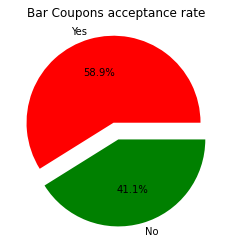

In [164]:
data_bar['Y'].value_counts().plot(kind='pie',ylabel='',explode=[0.1,0.1],autopct='%1.1f%%',colors=['r','g'],title="Bar Coupons acceptance rate",labels=['Yes','No'])

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


C:\Users\monke\AppData\Local\Temp/ipykernel_49896/232751025.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



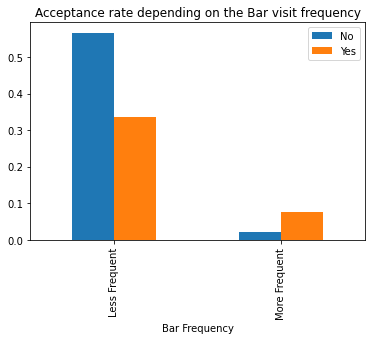

In [171]:
data_bar['bar_freq'] = 'Less Frequent'
data_bar.loc[data_bar["Bar"].isin(['gt8','4~8']),'bar_freq'] = 'More Frequent'
fig, ax = plt.subplots()
pd.crosstab(data_bar['bar_freq'],data_bar['Y'],normalize=True).plot(kind = 'bar',title="Acceptance rate depending on the Bar visit frequency",xlabel="Bar Frequency",ax=ax)
ax.legend(['No','Yes'])

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [137]:
data_bar['bar_freq_age'] = 'other'
data_bar.loc[((data_bar["age"] > 25) & data_bar["Bar"].isin(['1~3','gt8','4~8'])), 'bar_freq_age'] = 'more than once a month and are over the age of 25'

C:\Users\monke\AppData\Local\Temp/ipykernel_49896/993264748.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\monke\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:title={'center':'Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others'}>

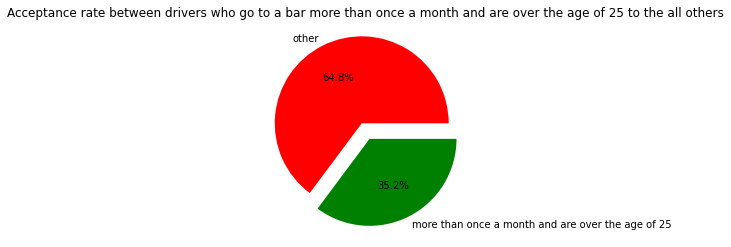

In [173]:
data_bar.query('Y == 1')['bar_freq_age'].value_counts().plot(kind='pie',ylabel="",explode=[0.1,0.1],autopct='%1.1f%%',colors=['r','g'],title="Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others")

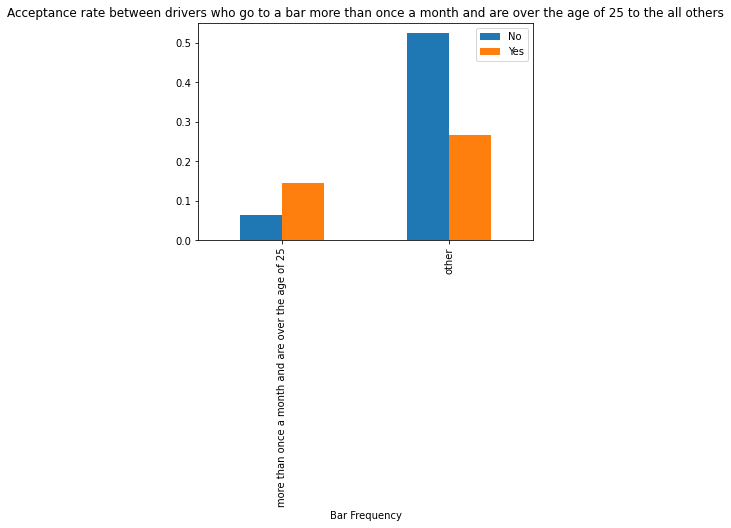

In [178]:
fig, ax = plt.subplots()
pd.crosstab(data_bar['bar_freq_age'],data_bar['Y'],normalize=True).plot(kind = 'bar',ax=ax,xlabel="Bar Frequency",title="Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others")
ax.legend(['No','Yes'])

In [185]:
px.histogram(data_bar,x='bar_freq_age',color='Y',histnorm='percent',labels={"Y": "Acceptance","bar_freq_age":"Bar Frequency"},title="Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others")

5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [193]:
data_bar['bar_freq_age'] = 'More than once a month with kid<br> and occupations other than farming, fishing, or forestry'
data_bar.loc[((data_bar["passanger"]!='Kid(s)') & (data_bar["Bar"].isin(['1~3','gt8','4~8'])) & (data_bar["occupation"] != 'Farming Fishing & Forestry')), 'bar_freq_age'] = 'Other'
px.histogram(data_bar,x='bar_freq_age',color='Y',labels={"Y": "Acceptance","bar_freq_age":"Bar Frequency"},title="Acceptance rate between drivers who go to bars more than once a month and <br>had passengers that were not a kid and had occupations other than farming, fishing, or forestry." )

C:\Users\monke\AppData\Local\Temp/ipykernel_49896/4243019550.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



1.go to bars more than once a month, had passengers that were not a kid, and were not widowed

C:\Users\monke\AppData\Local\Temp/ipykernel_49896/3937873984.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:title={'center':'Accepance rate of who go to bars more than once a month, \nhad passengers that were not a kid, and were not widowed'}>

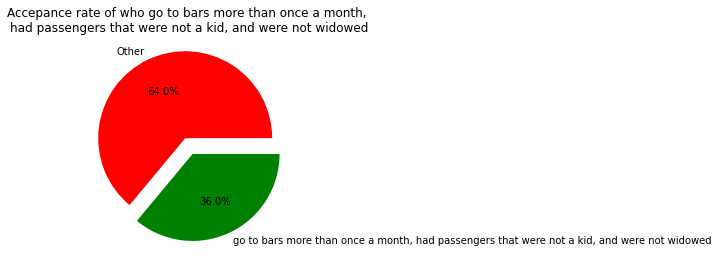

In [197]:
data_bar['bar_cate1'] = 'Other'

data_bar.loc[((data_bar["passanger"].isin(['Alone','Friend(s)','Partner'])) 
              & (data_bar["Bar"].isin(['1~3','gt8','4~8']))
              & (data_bar['maritalStatus'] != 'Widowed')),'bar_cate1'] = 'go to bars more than once a month, had passengers that were not a kid, and were not widowed'
#px.histogram(data_bar.query('Y==1'),x='bar_cate1',color='Y',histnorm='percent' )

data_bar.query('Y == 1')['bar_cate1'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['r','g'],ylabel="",title="Accepance rate of who go to bars more than once a month, \nhad passengers that were not a kid, and were not widowed")

2.go to bars more than once a month and are under the age of 30 

C:\Users\monke\AppData\Local\Temp/ipykernel_49896/3694574232.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:title={'center':'Accepance rate of who go to bars more than once a month and are under the age of 30'}>

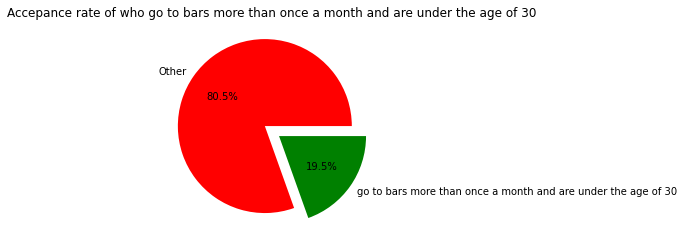

In [199]:
data_bar['bar_cate2'] = 'Other'

data_bar.loc[((data_bar["age"] > 30 )
              & (data_bar["Bar"].isin(['1~3','gt8','4~8']))),'bar_cate2'] = 'go to bars more than once a month and are under the age of 30'
#px.histogram(data_bar,x='bar_cate2',color='Y' )

data_bar.query('Y == 1')['bar_cate2'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['r','g'],ylabel="",title="Accepance rate of who go to bars more than once a month and are under the age of 30")

3.go to cheap restaurants more than 4 times a month and income is less than 50K.

C:\Users\monke\AppData\Local\Temp/ipykernel_49896/538822933.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:title={'center':'Accepance rate of who go to cheap restaurants more than 4 times a month and income is less than 50K.'}>

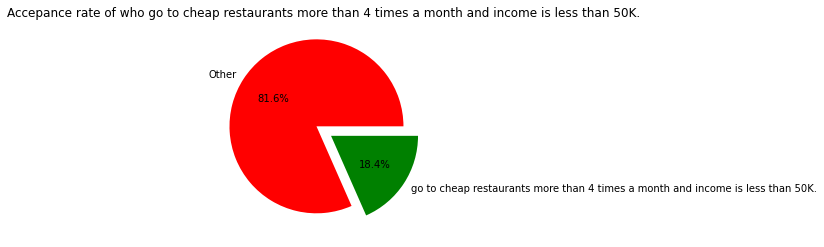

In [201]:
data_restaurant_20 = data.query('coupon == "Restaurant(<20)"')
data_restaurant_20['bar_cate3'] = 'Other'

data_restaurant_20.loc[((data_restaurant_20["income"].isin(['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']) )
              & (data_restaurant_20["RestaurantLessThan20"].isin(['gt8','4~8']))),'bar_cate3'] = 'go to cheap restaurants more than 4 times a month and income is less than 50K.'

#px.histogram(data_bar,x='bar_cate3',color='Y' )

data_restaurant_20.query('Y == 1')['bar_cate3'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['r','g'],ylabel="",title="Accepance rate of who go to cheap restaurants more than 4 times a month and income is less than 50K.")

9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

In [ ]:
#Only = 18.4% of the Restaurant<20 accepted coupons are by the passenger income is < 50 K and who goes to cheap restaurants more than 4 times
#Only = 19.5% of the Bar accepted coupons are by the passenger who go to bars more than once a month and are under the age of 30
#Only = 36% of the Bar accepted coupons are by the passenger who go to bars more than once a month, had passengers that were not a kid, and were not widowed
#Only = 35.2% of the Bar accepted coupons are by the passenger who go to a bar more than once a month and are over the age of 25 to the all others

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Investigating Restaurant(<20)

30% of the accepted Restaurant(<20) coupons are,
when the passanger is Alone or with Friend,
in sunny weather and,
the coupon time is 2PM or 6PM, and
the education is Some college - no degree or Bachelors degree

Generating codes for the category features to plot in the heatmap

In [131]:
data['gender'] = data['gender'].astype('category')
data['gender_codes'] = data['gender'].cat.codes

data['destination'] = data['destination'].astype('category')
data['destination_codes'] = data['destination'].cat.codes

data['Bar'] = data['Bar'].astype('category')
data['Bar_codes'] = data['Bar'].cat.codes

data['weather'] = data['weather'].astype('category')
data['weather_codes'] = data['weather'].cat.codes

data['temperature'] = data['temperature'].astype('category')
data['temperature_codes'] = data['temperature'].cat.codes

data['passanger'] = data['passanger'].astype('category')
data['passanger_codes'] = data['passanger'].cat.codes

data['occupation'] = data['occupation'].astype('category')
data['occupation_codes'] = data['occupation'].cat.codes

data['income'] = data['income'].astype('category')
data['income_codes'] = data['income'].cat.codes

data['RestaurantLessThan20'] = data['RestaurantLessThan20'].astype('category')
data['RestaurantLessThan20_codes'] = data['RestaurantLessThan20'].cat.codes

data['time'] = data['time'].astype('category')
data['time_codes'] = data['time'].cat.codes

data['expiration'] = data['expiration'].astype('category')
data['expiration_codes'] = data['expiration'].cat.codes

data['education'] = data['education'].astype('category')
data['education_codes'] = data['education'].cat.codes

data['occupation'] = data['occupation'].astype('category')
data['occupation_codes'] = data['occupation'].cat.codes

data['maritalStatus'] = data['maritalStatus'].astype('category')
data['maritalStatus_codes'] = data['maritalStatus'].cat.codes

data['has_children'] = data['has_children'].astype('category')
data['has_children_codes'] = data['has_children'].cat.codes

In [132]:
data.query('coupon == "Restaurant(<20)"').groupby(['Y'])[['Y']].count()
data_carry_restaurant_20 = data.query('coupon == "Restaurant(<20)"')
data_carry_restaurant_20_Y = data_carry_restaurant_20.query('Y == 1')
data_carry_restaurant_20_N = data_carry_restaurant_20.query('Y == 0')

Heatmap with the generated code

[Text(0.5, 1.0, 'Correlation for Restaurant(<20) over other features')]

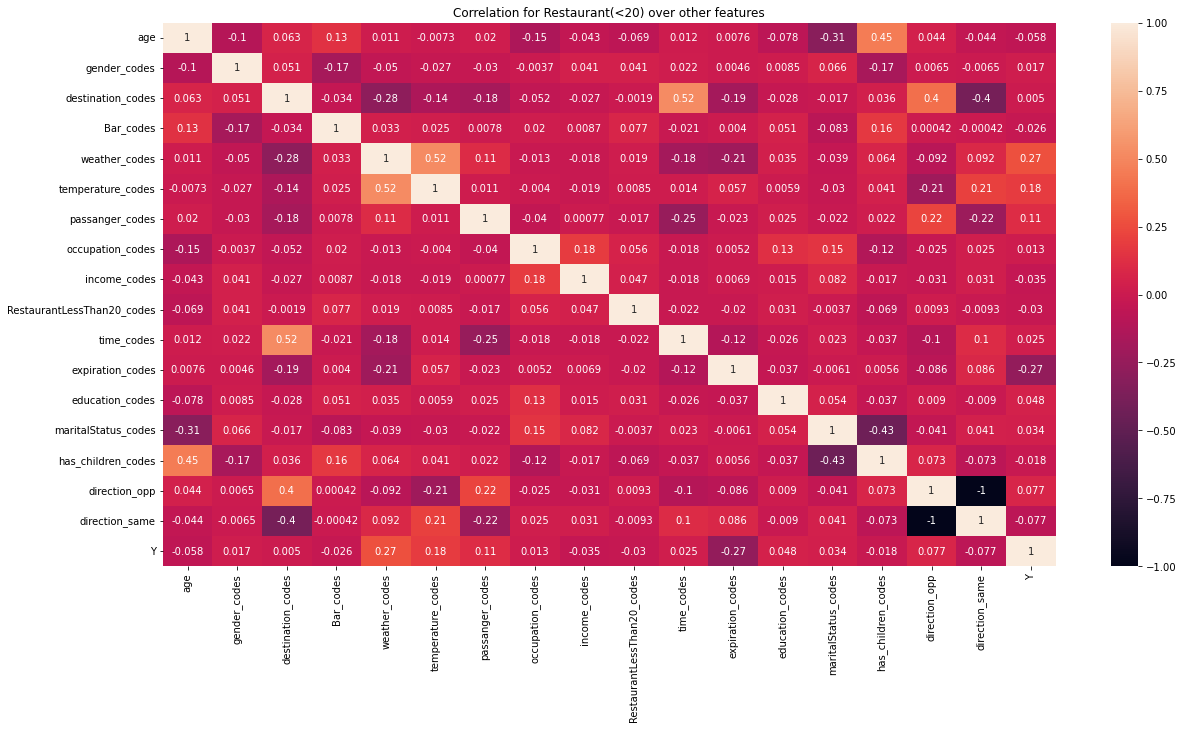

In [133]:
data_corr_1 = data_carry_restaurant_20[['age','gender_codes','destination_codes','Bar_codes','weather_codes','temperature_codes','passanger_codes','occupation_codes','income_codes','RestaurantLessThan20_codes','time_codes','expiration_codes','education_codes','maritalStatus_codes','has_children_codes','direction_opp','direction_same','Y']]
matrix=data_corr_1.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(matrix,annot=True)
ax.set(title="Correlation for Restaurant(<20) over other features")

In [134]:
px.histogram(data_carry_restaurant_20_Y.query('weather == "Sunny"'),x='time',histnorm='percent',title="Accepted coupon over time")

In [135]:
data_carry_restaurant_20_Y['education'].value_counts()
data_carry_restaurant_20['cat1'] = 'other'
data_carry_restaurant_20.loc[((data_carry_restaurant_20["weather"] == 'Sunny')& data_carry_restaurant_20['passanger'].isin(['Alone','Friend'])& data_carry_restaurant_20['time'].isin(['2PM','6PM']) & data_carry_restaurant_20["education"].isin(['Some college - no degree','Bachelors degree'])), 'cat1'] = 'Yes'
data_carry_restaurant_20[['passanger','weather','time','education','cat1']]

C:\Users\monke\AppData\Local\Temp/ipykernel_49896/2059668786.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,passanger,weather,time,education,cat1
0,Alone,Sunny,2PM,Some college - no degree,Yes
5,Friend,Sunny,6PM,Some college - no degree,Yes
7,Kid,Sunny,10AM,Some college - no degree,other
10,Kid,Sunny,2PM,Some college - no degree,other
11,Kid,Sunny,2PM,Some college - no degree,other
...,...,...,...,...,...
12666,Friend,Snowy,2PM,Bachelors degree,other
12668,Alone,Sunny,10AM,Bachelors degree,other
12671,Partner,Snowy,10AM,Bachelors degree,other
12677,Partner,Sunny,6PM,Bachelors degree,other


<AxesSubplot:title={'center':'Acceptance rate for the Passanger-Alone/Friend & weather-Sunny &\n time-2pm/6pm & education-Some college - no degree/Bachelors degree\n over others'}>

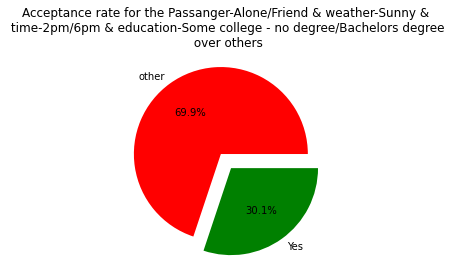

In [202]:
data_carry_restaurant_20.query('Y == 1')['cat1'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',ylabel="",colors=['r','g'],title="Acceptance rate for the Passanger-Alone/Friend & weather-Sunny &\n time-2pm/6pm & education-Some college - no degree/Bachelors degree\n over others")